In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [152]:
df = pd.read_csv('../data/unique_messages_goemotion_predictions.csv', index_col=0)

In [153]:
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981902
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.953519,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.31804,0.405695,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366795
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637


In [154]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [155]:
frequencies = []
for column in df.columns:
    frequencies.append(sum(df[column].apply(lambda x: set_frequency(x))))

In [156]:
print(frequencies)

[5215, 2967, 3519, 2338, 7498, 5267, 4222, 33828, 1366, 978, 3275, 257, 76, 1627, 424, 2632, 2, 1403, 1981, 69, 2205, 30, 1087, 110, 2124, 1308, 970, 106427]


In [157]:
# Sorting the frequencies in increasing order
freq_dict = dict(zip(df.columns, frequencies))
sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1]))

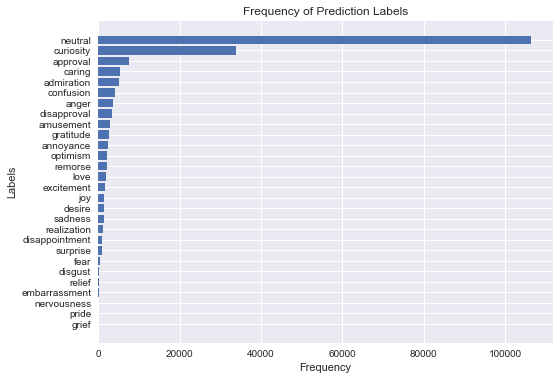

In [161]:
plt.barh(list(sorted_freq_dict.keys()), list(sorted_freq_dict.values()))
plt.title('Frequency of Prediction Labels')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('freq_preds.jpg')

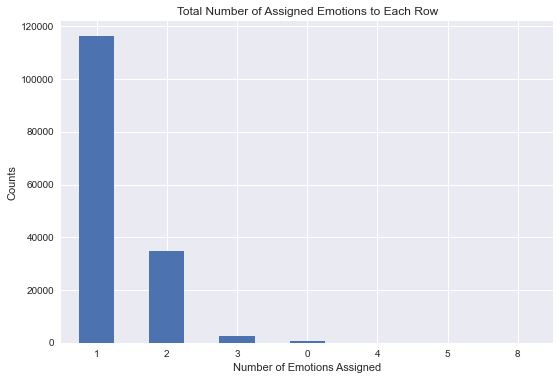

In [165]:
df.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('total_preds.jpg')

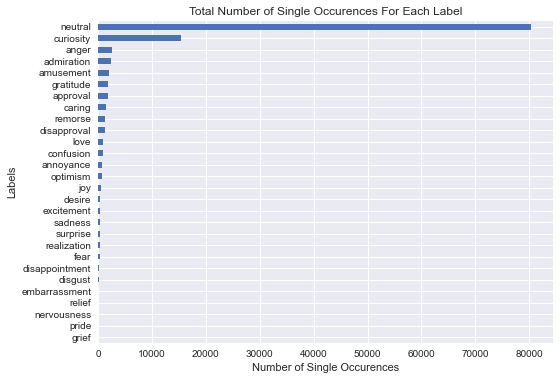

In [166]:
df[(df>0).sum(axis=1) == 1].astype(bool).sum(axis=0).sort_values(ascending=True).plot.barh()
plt.title('Total Number of Single Occurences For Each Label')
plt.xlabel('Number of Single Occurences')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('occurs_preds.jpg')

In [168]:
df[df.anger > 0]

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
66,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
113,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
120,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
131,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
194,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153768,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153769,0.0,0.0,0.821945,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153839,0.0,0.0,0.986109,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153958,0.0,0.0,0.453907,0.323391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807032


In [175]:
# Fixing the mean graph to include only instances that were labeled with each emotion
labels = df.columns
mean_scores = []
for label in labels:
    mean_scores.append(df.loc[df[label] > 0, label].mean())

In [176]:
mean_scores

[0.8375399659715471,
 0.9009053635002588,
 0.7343377218171255,
 0.7170581322281252,
 0.7215150715939742,
 0.7062325083498758,
 0.6385561428551197,
 0.7925116570918177,
 0.7200317673417869,
 0.65114647948425,
 0.7846696766915212,
 0.6934256029500108,
 0.7248021128930544,
 0.6392472963356576,
 0.7945137462525997,
 0.9303386131114691,
 0.39634984731674194,
 0.7052449547046435,
 0.8089054539039964,
 0.6729758213395658,
 0.7505727260696645,
 0.4961453129847844,
 0.6638766850148633,
 0.502596006881107,
 0.802957276503245,
 0.6973994211137112,
 0.7338052081078598,
 0.9130444094889141]

In [177]:
# Sorting the frequencies in increasing order
mean_dict = dict(zip(labels, mean_scores))
sorted_mean_dict = dict(sorted(mean_dict.items(), key=lambda item: item[1]))

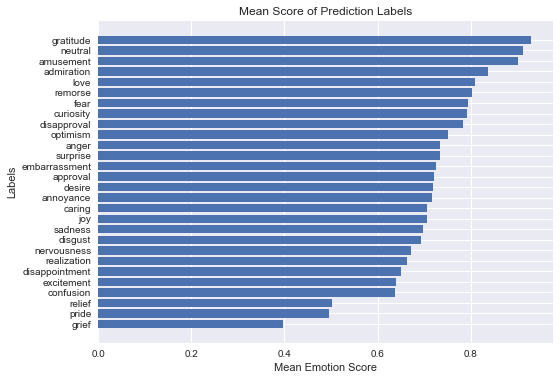

In [178]:
plt.barh(list(sorted_mean_dict.keys()), list(sorted_mean_dict.values()))
plt.title('Mean Score of Prediction Labels')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('mean_preds.jpg')